In [1]:
# Simple CNN model for CIFAR-10
# Importing required packages/libraries 
import numpy as np

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
#K.set_image_data_format('channels_first')
from keras.layers import Activation, Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
% matplotlib inline
from matplotlib import*


In [2]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
num_classes=10
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# one hot encode ouputs
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0


170500096/170498071 [==============================] - 2s 0us/step


In [3]:
# creating model
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(1024,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))

model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

In [4]:
# compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        3

In [6]:
# Fitting the model
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_split=0.2, shuffle=True)
scores = model.evaluate(X_test, y_test, verbose=1)
model.save('./model'+'.h5')

print("Test loss: ", scores[0])
print("Test accuracy: ", scores[1])

Epoch 1/25
1250/1250 [==============================] - 332s 265ms/step - loss: 2.1410 - accuracy: 0.1889 - val_loss: 1.6352 - val_accuracy: 0.4050
Epoch 2/25
1250/1250 [==============================] - 330s 264ms/step - loss: 1.5936 - accuracy: 0.4167 - val_loss: 1.5905 - val_accuracy: 0.4334
Epoch 3/25
1250/1250 [==============================] - 331s 264ms/step - loss: 1.3866 - accuracy: 0.4928 - val_loss: 1.4200 - val_accuracy: 0.5045
Epoch 4/25
1250/1250 [==============================] - 329s 263ms/step - loss: 1.2503 - accuracy: 0.5505 - val_loss: 1.1318 - val_accuracy: 0.5992
Epoch 5/25
1250/1250 [==============================] - 329s 263ms/step - loss: 1.1336 - accuracy: 0.5939 - val_loss: 1.0393 - val_accuracy: 0.6306
Epoch 6/25
1250/1250 [==============================] - 328s 263ms/step - loss: 1.0293 - accuracy: 0.6299 - val_loss: 0.9818 - val_accuracy: 0.6559
Epoch 7/25
1250/1250 [==============================] - 329s 263ms/step - loss: 0.9446 - accuracy: 0.6670 - val_

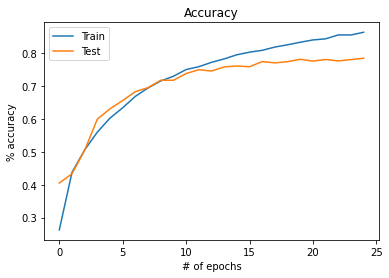

In [11]:
plt.figure()
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.title('Accuracy')
plt.ylabel("% accuracy")
plt.xlabel('# of epochs')
plt.legend()
plt.show()

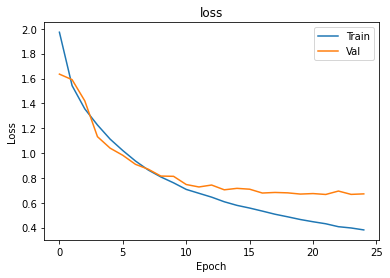

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [13]:
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                  'dog', 'frog', 'horse', 'ship', 'truck']
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

data = dict (zip(classes, classification))

In [21]:
image_test = []
for i in range(4):
  image_test = X_test[i]
  test = image_test.reshape(1,32,32,3)
  predict_img = np.argmax(model.predict(test), axis=-1)[0]
  print("Image Class: ", data[y_test[i][0]], '\n', "Predicted: ", data[predict_img])

Image Class:  airplane 
 Predicted:  cat
Image Class:  airplane 
 Predicted:  ship
Image Class:  airplane 
 Predicted:  ship
Image Class:  automobile 
 Predicted:  airplane
